In [1]:
%load_ext autoreload
%autoreload 2
!pwd
import os
import sys 
if os.path.abspath("../../../") not in sys.path:
    sys.path.append(os.path.abspath("../../../")) 

import os
import networkx as nx
from rwtools.nemesis.graph.nemesis_node import AbstractNemesisNode
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
from rwtools.nemesis.control_flow_graph import ControlFlowGraph


In [2]:
import sys 
sys.executable

'/home/gilles/git-repos/NemesisRetroWrite/retrowrite/venv/bin/python'

In [3]:
from test_main import setup 

binary = os.path.abspath("./loop/loop")
outputfile = "./loop/loop_rw.s"
loader, rw = setup(binary, outputfile)
rw.dump()

[*] Relocations for a section that's not loaded: .rela.dyn
[*] Relocations for a section that's not loaded: .rela.plt
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3df0
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8


In [4]:
with open(outputfile, "r") as f: 
    content = f.read() 
    print(content)

.section .rodata
.align 4
.type	_IO_stdin_used_2000,@object
.globl _IO_stdin_used_2000
_IO_stdin_used_2000: # 2000 -- 2004
.LC2000:
	.byte 0x1
.LC2001:
	.byte 0x0
.LC2002:
	.byte 0x2
.LC2003:
	.byte 0x0
.LC2004:
	.byte 0xa
.LC2005:
	.byte 0x0
.LC2006:
	.byte 0x0
.LC2007:
	.byte 0x0
.LC2008:
	.byte 0x14
.LC2009:
	.byte 0x0
.LC200a:
	.byte 0x0
.LC200b:
	.byte 0x0
.LC200c:
	.byte 0x1e
.LC200d:
	.byte 0x0
.LC200e:
	.byte 0x0
.LC200f:
	.byte 0x0

.section .data
.align 8
.LC4020:
	.byte 0x0
.LC4021:
	.byte 0x0
.LC4022:
	.byte 0x0
.LC4023:
	.byte 0x0
.LC4024:
	.byte 0x0
.LC4025:
	.byte 0x0
.LC4026:
	.byte 0x0
.LC4027:
	.byte 0x0
.LC4028:
	.quad .LC4028
.section .bss
.align 1
.type	completed.8060_4030,@object
.globl completed.8060_4030
completed.8060_4030: # 4030 -- 4031
.LC4030:
	.byte 0x0
.LC4031:
	.byte 0x0
.LC4032:
	.byte 0x0
.LC4033:
	.byte 0x0
.LC4034:
	.byte 0x0
.LC4035:
	.byte 0x0
.LC4036:
	.byte 0x0
.LC4037:
	.byte 0x0
.section .text
.align 16
	.text
.globl main
.type main, @function


[*] Relocations for a section that's not loaded: .rela.dyn
[*] Relocations for a section that's not loaded: .rela.plt
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3df0
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8


RecursionError: maximum recursion depth exceeded

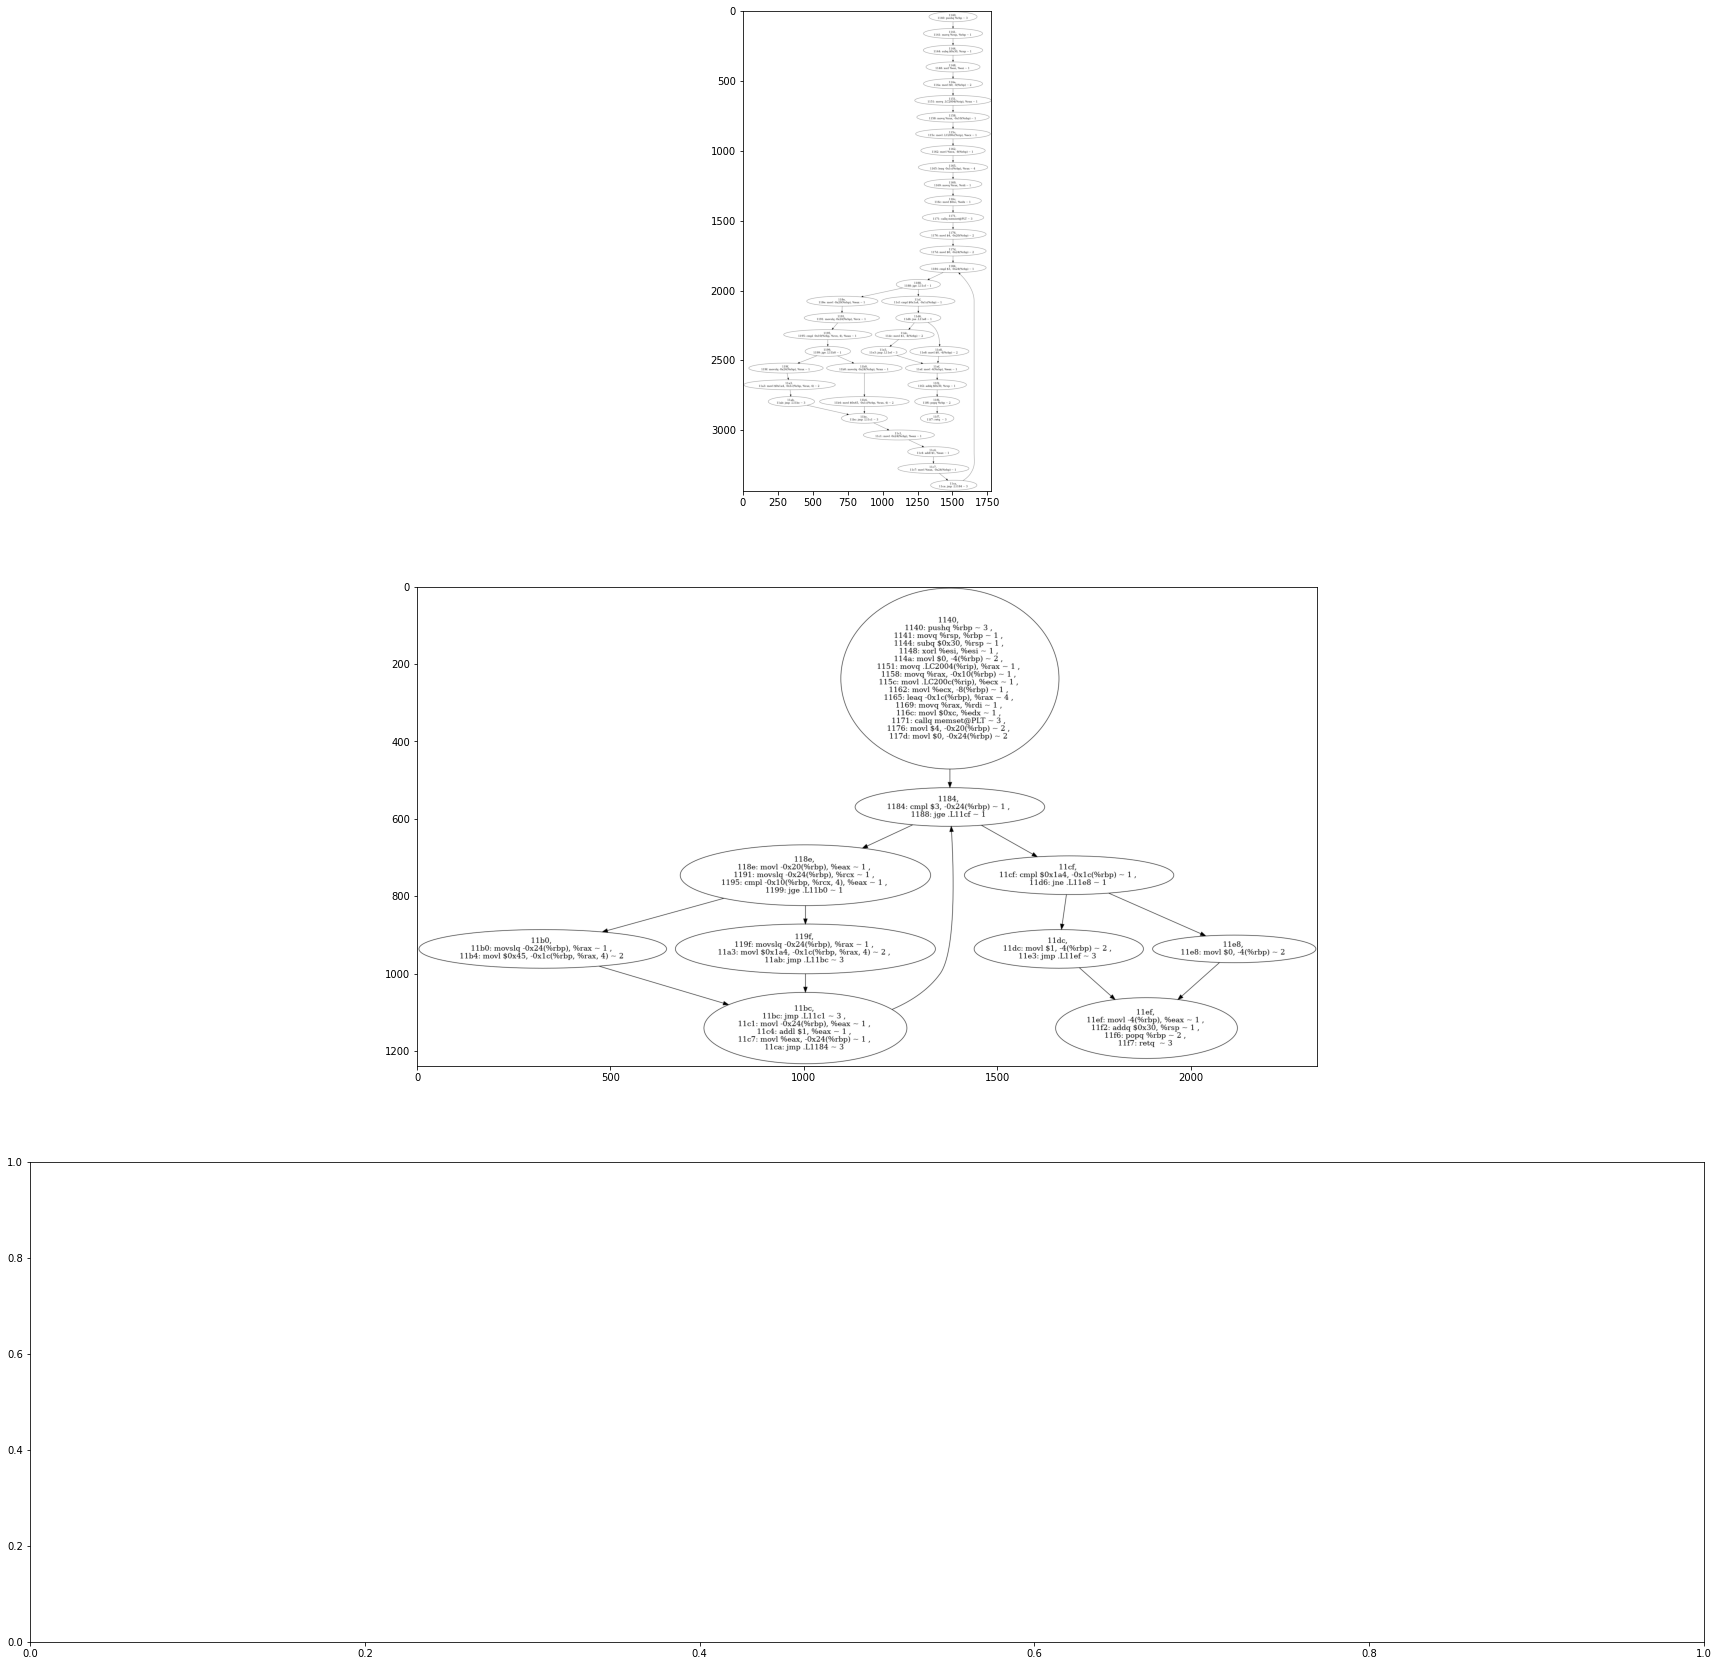

In [7]:
%autoreload 2 
from rwtools.nemesis.graph.utils import create_graph_structure, to_img
from rwtools.nemesis.graph.balance import balance_branching_point


loader, rw = setup(binary, outputfile)

# list of all function names -- for each function seperately make a graph and balance it
function_names = loader.container.function_names

nodes, graph = create_graph_structure(loader.container, "main")
fig, axs = plt.subplots(3, figsize=(30, 30))
axs[0].imshow(to_img(graph))
                    
control_flow_graph = ControlFlowGraph(nodes=nodes, graph=graph)
control_flow_graph.merge_consecutive_nodes()

axs[1].imshow(to_img(graph))

target_node = control_flow_graph.get_node('1140')

# balance_branching_point(control_flow_graph, target_node)

# control_flow_graph.balance_branching_node('1130')

# axs[2].imshow(to_img(graph))